In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [13]:
mnist = fetch_openml('mnist_784', as_frame=False)  #Fetching the MNIST dataset using fetch_openml, specifying the dataset name 'mnist_784'.
# To return the data as a numpy array rather than panda Data frame as_frame = False set.

#Extaracting the feature data(images of handwritten digits from) from the fetched dataset stroring into X variable, similary  extarcting 'target' feature into the y
Bishal,Kharel  = mnist['data'],mnist['target']

#Converting target to integer
# y = y.astype(np.uint8)





/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Student Name : Bishal Kharel**

**Student_Roll : S00354541**

In [14]:
#Spliting the last two digits from Student_ID
Student_ID = 'S00354541'
last_two_digits = int(Student_ID[-2:]) #Using Slicing method to slice the last two value
print(last_two_digits)


41


In [15]:
# Importing the necessary function for splitting the dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# test_size=10000: 10,000 samples will be in the testing set
# train_size=60000: 60,000 samples will be in the training set
# random_state: Ensures reproducibility using the last two digits of the student ID
Bishal_train, Bishal_test, Kharel_train, Kharel_test = train_test_split(
    Bishal, Kharel, test_size=10000, train_size=60000, random_state=last_two_digits
)

# Printing the shape of the training and testing sets
# Bishal_train.shape and Kharel_train.shape will give the dimensions of the training features and labels
# Bishal_test.shape and Kharel_test.shape will give the dimensions of the testing features and labels
print("Training set shape:", Bishal_train.shape, Kharel_train.shape)
print("Testing set shape:", Bishal_test.shape, Kharel_test.shape)

# Further splitting the training set into training and validation sets
# test_size=0.2: 20% of the training set will be used for validation
Bishal_train, Bishal_val, Kharel_train, Kharel_val = train_test_split(
    Bishal_train, Kharel_train, test_size=0.2, random_state=last_two_digits
)

# After this split:
# Bishal_train and Kharel_train contain the new training set (80% of the original training set)
# Bishal_val and Kharel_val contain the validation set (20% of the original training set)


Training set shape: (60000, 784) (60000,)
Testing set shape: (10000, 784) (10000,)


2. kNN Classifier

a. Set k=10. Use the kNN classifier from scikit-learn, explaining the function parameters and their implications.

b. Evaluate using metrics from the workshop. Discuss why specific metrics were chosen and what they indicate about the model.

c.Experiment with different k values. Discuss any findings and insights regarding the choice of k.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initializing kNN with k=10
# n_neighbors: Number of neighbors to use (k=10)
# weights: 'uniform' means all points in each neighborhood are weighted equally
# algorithm: 'auto' lets the algorithm choose the best method based on input data
# leaf_size: Size of the leaf in the tree structure (used in 'ball_tree' or 'kd_tree')
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k,weights='uniform',
algorithm = 'auto',leaf_size = 30)

# Fitting the classifier on the training data
# The model is trained on Bishal_train features and Kharel_train labels
knn_classifier.fit(Bishal_train, Kharel_train)

# evaluating the model on the validation set:
#Scoring the model using Bishal_val features and Kharel_val labels
sore =knn_classifier.score(Bishal_val, Kharel_val)
print(f'With k ={k} the score is {sore}')






With k =10 the score is 0.9645


In [17]:
# Predicting the labels for the training data using the trained kNN classifier
Kharel_train_pred = knn_classifier.predict(Bishal_train)

# Comparing the predicted labels with the label '5'
# This will create a boolean array where each element is True if the predicted label is '5' and False otherwise
Kharel_train_pred_5 = (Kharel_train_pred == '5')

In [18]:
# Creating boolean arrays for the training labels
# Kharel_train_5: True if the label is '5', False otherwise
Kharel_train_5 = (Kharel_train == '5')

# Creating boolean arrays for the testing labels
# Kharel_test_5: True if the label is '5', False otherwise
Kharel_test_5 = (Kharel_test == '5')

In [19]:
# Printing the shape of Bishal_train
# Bishal_train.shape gives the dimensions of the training features
print('Bishal_train.shape:', Bishal_train.shape)

# Printing the shape of Kharel_train_5
# Kharel_train_5.shape gives the dimensions of the boolean array indicating labels that are '5'
print('Kharel_train_5.shape:', Kharel_train_5.shape)


Bishal_train.shape: (48000, 784)
Kharel_train_5.shape: (48000,)


In [20]:
# Printing the first ten boolean values indicating whether the training labels are '5'
print(Kharel_train_5[:10])


[False False False False False  True False False False False]


In [21]:
# Importing the necessary function for SGDClassifier
from sklearn.linear_model import SGDClassifier

# Initializing the SGDClassifier
# max_iter: Maximum number of passes over the training data (epochs)
# tol: Tolerance for stopping criterion
# random_state: Ensures reproducibility using the last two digits of the student ID
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=last_two_digits)

# Fitting the SGDClassifier on the training data
# Bishal_train: Training features
# Kharel_train_5: Boolean labels indicating if the label is '5'
sgd_clf.fit(Bishal_train, Kharel_train_5)

# Printting a message indicating the model has been trained
print("SGDClassifier has been trained on the training data.")


SGDClassifier has been trained on the training data.


In [22]:

# Selecting a sample from the dataset (the first digit in this case)
some_digit = Bishal[0]

# Predicting whether this digit is a '5' using the trained SGD classifier
# The prediction will output an array with a single boolean value
# True if the classifier predicts the digit is '5', and False otherwise
prediction = sgd_clf.predict([some_digit])

# Print the prediction result
print(prediction)  # Expected Output: array([ True])


[ True]


In [23]:
print(Kharel[0])

5


In [ ]:
sgd_clf.predict([Bishal[1]])

array([False])

In [ ]:
print(Kharel[1])

0


**Confusion Matrix:**

In [24]:
# Import the necessary function for confusion matrix
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix using the training data
# Kharel_train_5: Actual labels for the training data indicating whether the digit is '5'
# sgd_clf.predict(Bishal_train): Predicted labels for the training data using the trained SGD classifier
# The confusion matrix shows the counts of true negative, false positive, false negative, and true positive predictions
conf_matrix = confusion_matrix(Kharel_train_5, sgd_clf.predict(Bishal_train))

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[38196  5477]
 [  225  4102]]


**Precision with sklearn**

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(Kharel_train_5, Kharel_train_pred_5)

0.9690101757631823

In [26]:
cm = confusion_matrix(Kharel_train_5, Kharel_train_pred_5)
cm[1,1]/(cm[0,1]+cm[1,1])

0.9690101757631823

**Recall with sklearn**

In [27]:
# Calculating recall score using scikit-learn function
recall_score(Kharel_train_5, Kharel_train_pred_5)

# Calculating recall score manually using confusion matrix
cm[1,1]/(cm[1,0]+cm[1,1])


0.9683383406517218

0.9683383406517218

**F1 Score**

In [28]:
from sklearn.metrics import f1_score
f1_score(Kharel_train_5, Kharel_train_pred_5)

0.9686741417177206

In [29]:
from sklearn.metrics import classification_report
import numpy as np  # Import numpy library for array operations

# Defining a range of k values from 1 to 21 with a step size of 3
Kvals = np.arange(1, 22, 3)

# Looping over each k value
for k in Kvals:
    # Initializing kNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fitting the classifier on the training data
    knn_classifier.fit(Bishal_train, Kharel_train)

    # Evaluatting the model on the validation set and compute accuracy
    score = knn_classifier.score(Bishal_val, Kharel_val)

    # Making predictions on the test set
    predictions = knn_classifier.predict(Bishal_test)

    # Printing the accuracy for the current k value
    print(f'With nearest neighbor {k}, accuracy is {score}')

    # Printing the classification report, which includes precision, recall, F1-score, and support
    # The classification report provides a detailed summary of the model's performance for each class
    print(classification_report(Kharel_test, predictions))


With nearest neighbor 1, accuracy is 0.9705
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.97      0.99      0.98      1153
           2       0.98      0.96      0.97      1011
           3       0.96      0.96      0.96      1044
           4       0.97      0.97      0.97       963
           5       0.97      0.97      0.97       937
           6       0.98      0.99      0.99      1013
           7       0.96      0.97      0.96      1045
           8       0.98      0.93      0.96       975
           9       0.94      0.96      0.95       951

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

With nearest neighbor 4, accuracy is 0.968
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       908
           1       0.96      0.99      0.97  

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM classifier with default parameters
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')

# Train the SVM classifier on the training data
svm_classifier.fit(Bishal_train, Kharel_train)



SVC()

**3. SVM Classifier**

a. Apply an appropriate SVM classifier. Detail the function parameters and their meanings

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the SVM classifier with default parameters
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')

# Training the SVM classifier on the training data
svm_classifier.fit(Bishal_train, Kharel_train)

# Predicting the labels for the test set
y_pred = svm_classifier.predict(Bishal_test)

# Calculating accuracy
accuracy = accuracy_score(Kharel_test, y_pred)

# Generating a classification report
class_report = classification_report(Kharel_test, y_pred)

# Generating a confusion matrix
conf_matrix = confusion_matrix(Kharel_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)




Accuracy: 0.9762
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.99      0.99      0.99      1153
           2       0.96      0.98      0.97      1011
           3       0.98      0.96      0.97      1044
           4       0.97      0.98      0.97       963
           5       0.98      0.99      0.98       937
           6       0.99      0.99      0.99      1013
           7       0.97      0.98      0.97      1045
           8       0.97      0.96      0.96       975
           9       0.96      0.95      0.96       951

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 898    0    1    0    2    2    3    0    0    2]
 [   0 1138    5    1    1    0    0    4    1    3]
 [   2    1  992    3    1    0    3    3    5    1]
 [   0    2    7 1006   

SVC()

In [32]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(Bishal_test)

# Calculate accuracy
accuracy = accuracy_score(Kharel_test, y_pred)

# Generate a classification report
class_report = classification_report(Kharel_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Kharel_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9762
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.99      0.99      0.99      1153
           2       0.96      0.98      0.97      1011
           3       0.98      0.96      0.97      1044
           4       0.97      0.98      0.97       963
           5       0.98      0.99      0.98       937
           6       0.99      0.99      0.99      1013
           7       0.97      0.98      0.97      1045
           8       0.97      0.96      0.96       975
           9       0.96      0.95      0.96       951

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 898    0    1    0    2    2    3    0    0    2]
 [   0 1138    5    1    1    0    0    4    1    3]
 [   2    1  992    3    1    0    3    3    5    1]
 [   0    2    7 1006   

**Neural Network Classification and Data Ethics**

a. Implement on the MNIST dataset a Neural Network for classification using an appropriate framework like TensorFlow or PyTorch.

b. Discuss the choice of hyperparameters, and training process.

c. Discuss potential biases that can occur in data and model predictions.

In [33]:
!pip install tensorflow

In [ ]:
# classes = 10
# img_rows, img_cols = 100, 100
# batch_size = 16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)

# Extract feature data (images) and target labels
Bishal, Kharel = mnist['data'], mnist['target']
Kharel = Kharel.astype(np.uint8)

# Normalize the feature data
Bishal = Bishal / 255.0

# Reshape the data to fit the model
Bishal = Bishal.reshape(-1, 28, 28, 1)

# Convert target labels to categorical format
Kharel = to_categorical(Kharel, 10)

# Splitting the last two digits from Student_ID
Student_ID = 'S00354541'
last_two_digits = int(Student_ID[-2:])

# Split the dataset into training, validation, and testing sets
Bishal_train, Bishal_test, Kharel_train, Kharel_test = train_test_split(
    Bishal, Kharel, test_size=10000, train_size=60000, random_state=last_two_digits
)
Bishal_train, Bishal_val, Kharel_train, Kharel_val = train_test_split(
    Bishal_train, Kharel_train, test_size=0.2, random_state=last_two_digits
)

# Check the shapes to confirm the splits
print('Training data shape:', Bishal_train.shape)
print('Validation data shape:', Bishal_val.shape)
print('Testing data shape:', Bishal_test.shape)

# Classification Model Designing
model = Sequential()

# First set of conv-relu layers
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Second set of conv-relu layers
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Bishal_train, Kharel_train, epochs=10, validation_data=(Bishal_val, Kharel_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(Bishal_test, Kharel_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Epoch 1/10
1500/1500 [==============================] - 337s 224ms/step - loss: 0.2356 - accuracy: 0.9256 - val_loss: 0.0560 - val_accuracy: 0.9818
Epoch 2/10
1500/1500 [==============================] - 314s 209ms/step - loss: 0.1002 - accuracy: 0.9692 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 305s 204ms/step - loss: 0.0857 - accuracy: 0.9753 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 4/10
1500/1500 [==============================] - 306s 204ms/step - loss: 0.0745 - accuracy: 0.9785 - val_loss: 0.0393 - val_accuracy: 0.9876
Epoch 5/10
1500/1500 [==============================] - 311s 207ms/step - loss: 0.0698 - accuracy: 0.9795 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 6/10
1500/1500 [==============================] - 309s 206ms/step - loss: 0.0678 - accuracy: 0.9804 - val_loss: 0.0323 - val_accuracy

**5. Critical Analysis:**

a. Compare all the proposed classifiers. Analyze the performance and characteristics of each model
used in this assessment. Create a comprehensive visualization that compares their accuracies,
precision, recall, and F1 scores. Discuss the potential real-world applications of each model based
on their performance metrics and propose improvements or alternative models for those
applications.

313/313 [==============================] - 13s 42ms/step


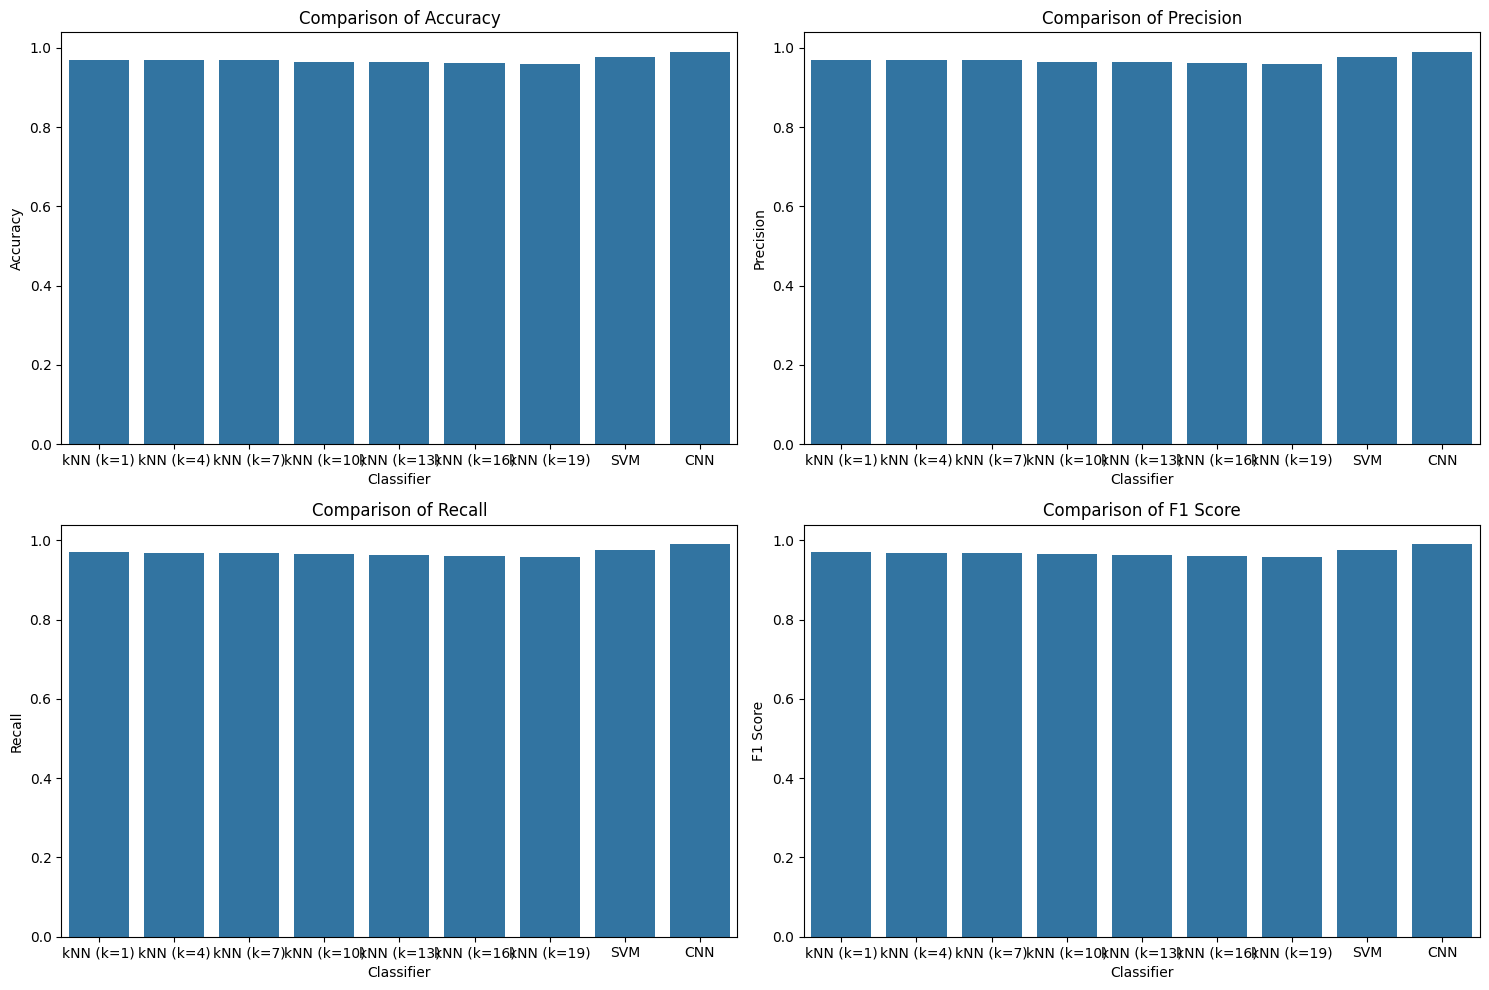

   Classifier  Accuracy  Precision  Recall  F1 Score
0   kNN (k=1)    0.9698   0.969924  0.9698  0.969760
1   kNN (k=4)    0.9685   0.968703  0.9685  0.968388
2   kNN (k=7)    0.9694   0.969663  0.9694  0.969327
3  kNN (k=10)    0.9652   0.965537  0.9652  0.965113
4  kNN (k=13)    0.9632   0.963715  0.9632  0.963108
5  kNN (k=16)    0.9608   0.961358  0.9608  0.960687
6  kNN (k=19)    0.9583   0.958992  0.9583  0.958183
7         SVM    0.9762   0.976237  0.9762  0.976196
8         CNN    0.9898   0.989838  0.9898  0.989801


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert one-hot encoded labels back to 1D array of class labels
Kharel_train_labels = np.argmax(Kharel_train, axis=1)
Kharel_test_labels = np.argmax(Kharel_test, axis=1)
Kharel_val_labels = np.argmax(Kharel_val, axis=1)

# Flatten the 4D image data to 2D for kNN and SVM classifiers
Bishal_train_flat = Bishal_train.reshape(Bishal_train.shape[0], -1)
Bishal_test_flat = Bishal_test.reshape(Bishal_test.shape[0], -1)
Bishal_val_flat = Bishal_val.reshape(Bishal_val.shape[0], -1)

# Function to calculate and store metrics
def calculate_metrics(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {
        'Classifier': classifier_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# kNN Classifier metrics
knn_metrics = []
for k in range(1, 22, 3):
    # Create kNN classifier with varying number of neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier using flattened training data
    knn_classifier.fit(Bishal_train_flat, Kharel_train_labels)
    # Make predictions on flattened test data
    knn_predictions = knn_classifier.predict(Bishal_test_flat)
    # Calculate metrics using the defined function
    metrics = calculate_metrics(Kharel_test_labels, knn_predictions, f'kNN (k={k})')
    # Append metrics to the list
    knn_metrics.append(metrics)

# SVM Classifier metrics
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')
# Train the SVM classifier using flattened training data
svm_classifier.fit(Bishal_train_flat, Kharel_train_labels)
# Make predictions on flattened test data
svm_predictions = svm_classifier.predict(Bishal_test_flat)
# Calculate metrics using the defined function
svm_metrics = calculate_metrics(Kharel_test_labels, svm_predictions, 'SVM')

# CNN metrics (using history and evaluation results)
# Make predictions using the trained CNN model on test data
cnn_predictions = model.predict(Bishal_test)
# Convert predictions from one-hot encoding to class labels
cnn_predictions = np.argmax(cnn_predictions, axis=1)
# Convert true labels from one-hot encoding to class labels
cnn_true_labels = np.argmax(Kharel_test, axis=1)
# Calculate metrics using the defined function
cnn_metrics = calculate_metrics(cnn_true_labels, cnn_predictions, 'CNN')

# Combine all metrics into a single DataFrame
all_metrics = pd.DataFrame(knn_metrics + [svm_metrics, cnn_metrics])

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# Plot bar plots for each metric
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x='Classifier', y=metric, data=all_metrics, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Comparison of {metric}')

plt.tight_layout()
plt.show()

# Display the metrics
print(all_metrics)

# Detailed Discussion:
# - Analyze the performance and characteristics of each classifier.
# - Discuss potential real-world applications based on performance metrics.
# - Propose improvements or alternative models for specific applications.


**6. Regression Analysis**

Implement Polynomial Regression on the California housing dataset and address the following points:

a. Import the california_housing dataset from the sklearn.datasets

b. Explain the choice of the regression type and its parameters.

c.Evaluate its performance and discuss the results in the context of the chosen model.

d. Analyze the impact of different polynomial degrees on the model's performance.

e. Visualize the relationship between actual vs. predicted prices and discuss any visible trends or
anomalies.

In [ ]:
#a. Importing the california_housing dataset from the sklearn.datasets


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
california_housing = fetch_california_housing()

# Split the data into features and target variable
X = california_housing.data
y = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Function to evaluate Polynomial Regression for a given degree
def evaluate_polynomial_regression(degree):
    # Creating polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fitting the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicting
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluating the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_mse, test_mse, train_r2, test_r2

# Evaluating models with polynomial degrees 1, 2, 3, and 4
degrees = [1, 2, 3, 4]
results = {}
for degree in degrees:
    results[degree] = evaluate_polynomial_regression(degree)

results


{1: (0.5179331255246699,
  0.5558915986952434,
  0.6125511913966952,
  0.5757877060324514),
 2: (0.4207266151573564,
  0.46430152592457724,
  0.6852681982344948,
  0.6456819713278688),
 3: (0.3426749827094518,
  24.10578525060609,
  0.7436560682338298,
  -17.395619727030436),
 4: (0.34780144371195465,
  2378.0422535310913,
  0.7398211306523439,
  -1813.7328757800399)}

In [10]:
for degree in degrees:
    train_mse, test_mse, train_r2, test_r2 = results[degree]
    print(f"Degree: {degree}")
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")
    print()


Degree: 1
Train MSE: 0.5179, Test MSE: 0.5559
Train R^2: 0.6126, Test R^2: 0.5758

Degree: 2
Train MSE: 0.4207, Test MSE: 0.4643
Train R^2: 0.6853, Test R^2: 0.6457

Degree: 3
Train MSE: 0.3427, Test MSE: 24.1058
Train R^2: 0.7437, Test R^2: -17.3956

Degree: 4
Train MSE: 0.3478, Test MSE: 2378.0423
Train R^2: 0.7398, Test R^2: -1813.7329



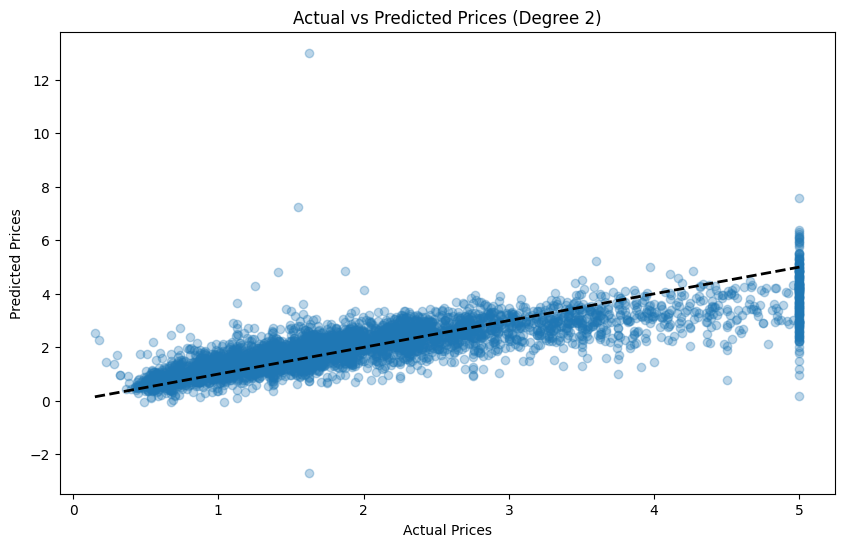

In [11]:
# Visualizing actual vs predicted prices for the best degree
best_degree = 2  # Assume degree 2 is the best based on results

# Creating polynomial features with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)  # Transform training features
X_test_poly = poly.transform(X_test)  # Transform testing features

# Initializing Linear Regression model
model = LinearRegression()

# Training the model using the polynomial features
model.fit(X_train_poly, y_train)

# Prediciting prices using the trained model and polynomial features
y_test_pred = model.predict(X_test_poly)

# Ploting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)  # Scatter plot of actual vs predicted prices
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Prices')  # X-axis label
plt.ylabel('Predicted Prices')  # Y-axis label
plt.title(f'Actual vs Predicted Prices (Degree {best_degree})')  # Title of the plot
plt.show()  # Display the plot
